In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
data = pd.read_csv("dly532_processed.csv")
y = data["Rainy"]
X = data.drop(["Rainy","date"], axis=1).values
data_feature_name = data.columns[1:19]

In [70]:
data_feature_name

Index(['maxtp', 'mintp', 'igmin', 'gmin', 'cbl', 'wdsp', 'hm', 'ddhm', 'hg',
       'sun', 'dos', 'g_rad', 'soil', 'pe', 'evap', 'smd_wd', 'smd_md',
       'smd_pd'],
      dtype='object')

In [71]:
clf = tree.DecisionTreeClassifier(max_depth=7)
score = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
print('Accuracy = %s' % (np.mean(score)))

Accuracy = 0.8157447940830129


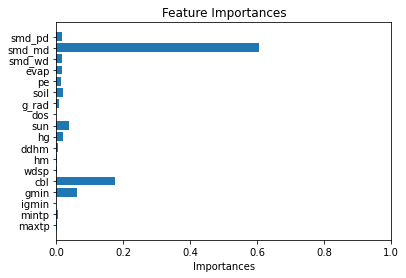

In [72]:
clf.fit(X,y)
y_importances = clf.feature_importances_
x_importances = data_feature_name
y_pos = np.arange(len(x_importances))
plt.barh(y_pos,y_importances,align='center')
plt.yticks(y_pos,x_importances)
plt.xlabel('Importances')
plt.xlim(0,1)
plt.title('Feature Importances')
plt.show()

In [65]:
y_tree=[]
for i in range(len(y)):
    y_tree.append(str(y[i]))

In [66]:
from sklearn.tree import export_graphviz

In [67]:
export_graphviz(clf,out_file='tree.dot',
               feature_names = data_feature_name,
               class_names = ['-1','1'],
               rounded = True, proportion =False,
               precision = 2, filled = True)